In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

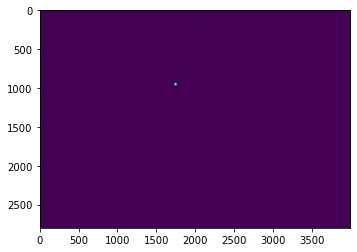

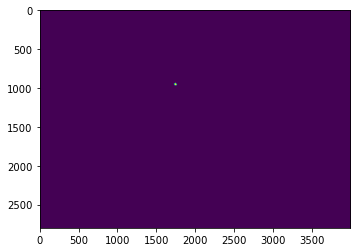

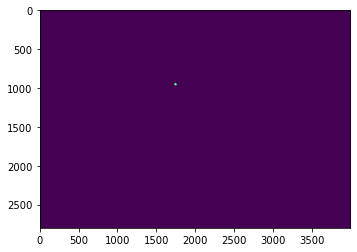

In [8]:
# read image
image = cv.imread('input_multicolor_thresh.jpg', cv.IMREAD_GRAYSCALE)
# image = cv.imread('sunday_thresh.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(image)
plt.show()
# morphologic operations
kernel_size = 5
kernel = np.ones(shape=(kernel_size,kernel_size), dtype=np.uint8)
# open
opening = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.show()
# close
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.show()


In [10]:
# blob detection (BLOB = Binary Large Object)
params = cv.SimpleBlobDetector_Params()
# Change thresholds -> we actually already have a binary image -> thresholded by colors
params.minThreshold = 200
params.maxThreshold = 220
# Filter by Area -> take only blobs with area greater than 100 pixels
params.filterByArea = True
params.minArea = 100

params.filterByColor = False
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv.SimpleBlobDetector_create(params)

In [11]:
k = detector.detect(closing)
for p in k:
    print(p.pt, p.size)

(1741.3958740234375, 952.3488159179688) 30.10637664794922


In [12]:
type(k[0].pt)

tuple

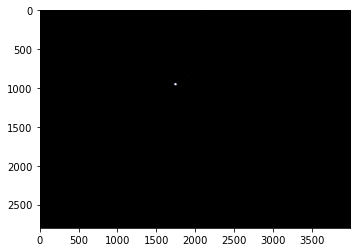

In [13]:
out = cv.drawKeypoints(image, k, np.array([]), (0, 0, 255),  cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(out)
plt.show()

In [14]:
params.minThreshold, params.maxThreshold, params.thresholdStep, params.maxArea

(200.0, 220.0, 10.0, 5000.0)